In [1]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter

# 제스처 리스트 정의
gesture_list = ["Head_Nod", "Head_Tilt", "Head_Gesture", "Head_Shake", "Sarcastic_Head_Nod",
                "Annoyed_Head_Shake", "Thoughtful_Head_Shake", "Lengthy_Head_Nod", "Thoughtful_Head_Nod"]

# 폴더 경로 설정
base_folder = os.getcwd()  # 현재 폴더에 Python 파일이 있다고 가정
folders = ['0', '1', '2']  # 0번, 1번, 2번 폴더

# 제스처 수행 횟수 및 빈도 저장을 위한 변수
gesture_counts = {0: Counter({gesture: 0 for gesture in gesture_list}),
                  1: Counter({gesture: 0 for gesture in gesture_list}),
                  2: Counter({gesture: 0 for gesture in gesture_list})}
gesture_performance = {0: 0, 1: 0, 2: 0}

# 각 폴더에서 JSON 파일을 읽고 분석
for i, folder_name in enumerate(folders):
    folder_path = os.path.join(base_folder, folder_name, 'json')  # json 폴더 경로
    
    if not os.path.exists(folder_path):
        continue  # json 폴더가 존재하지 않으면 넘어감
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                # 제스처 수행 횟수 계산
                gesture_performance[i] += len(data.get('gesture', []))  # 'gesture' 키가 없으면 빈 리스트로 처리
                for gesture in data.get('gesture', []):
                    if gesture['gesture'] in gesture_list:
                        gesture_counts[i][gesture['gesture']] += 1


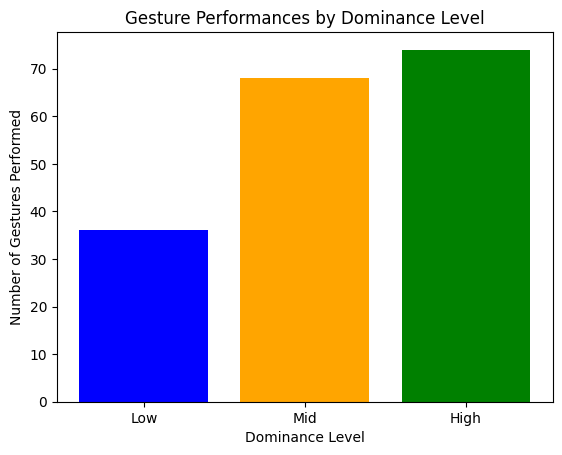

In [2]:
# 제스처 수행 횟수 그래프 생성
plt.bar(gesture_performance.keys(), gesture_performance.values(), color=['blue', 'orange', 'green'])
plt.xticks([0, 1, 2], ['Low', 'Mid', 'High'])
plt.xlabel('Dominance Level')
plt.ylabel('Number of Gestures Performed')
plt.title('Gesture Performances by Dominance Level')
plt.show()

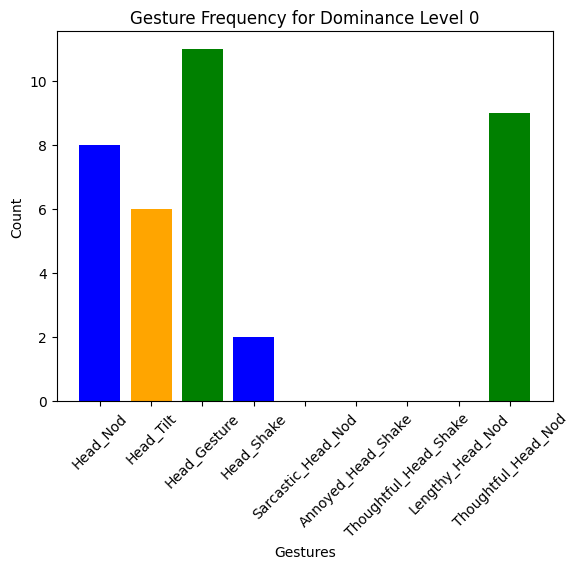

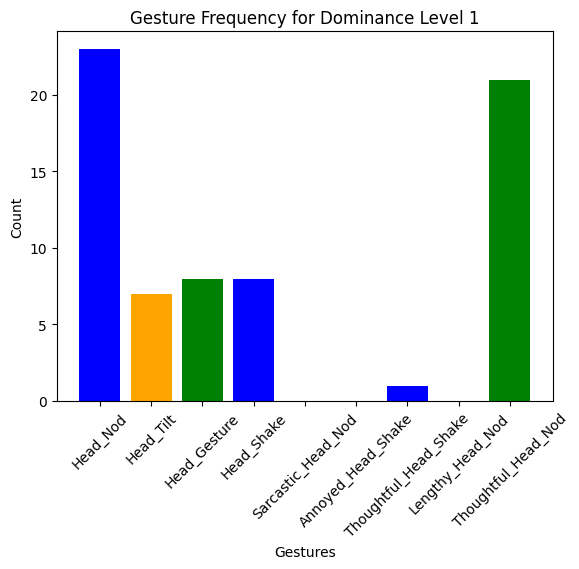

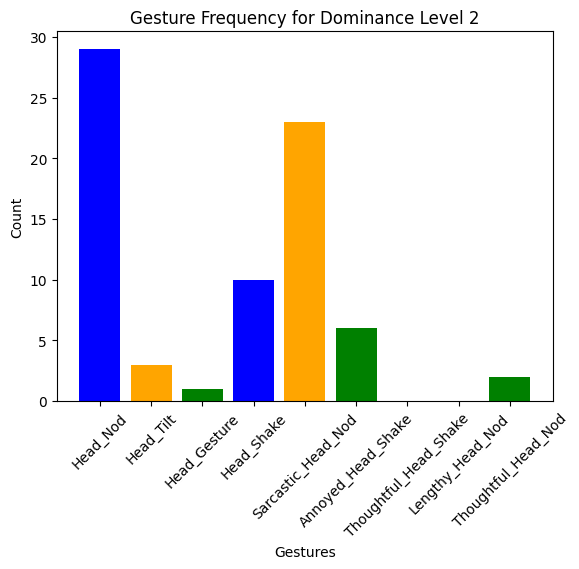

In [3]:
# 각 Dominance 레벨에서 많이 사용된 제스처 빈도 그래프 생성
for dom_level, gestures in gesture_counts.items():
    plt.figure()
    plt.bar(gestures.keys(), gestures.values(), color=['blue', 'orange', 'green'])
    plt.xlabel('Gestures')
    plt.ylabel('Count')
    plt.title(f'Gesture Frequency for Dominance Level {dom_level}')
    plt.xticks(rotation=45)
    plt.show()